In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

In [2]:
def prop_err_mol(a, b, sa, sb):
    return np.sqrt(sa**2 * b**2 + sb**2 * a**2) 
def exp(x, a, b):
    return a * np.exp(-b * x) 

In [3]:
def ang_sol_exp(x, a, b, c):
    return a / (b + x)**2 * np.exp(-c*x)

# PLASTICA

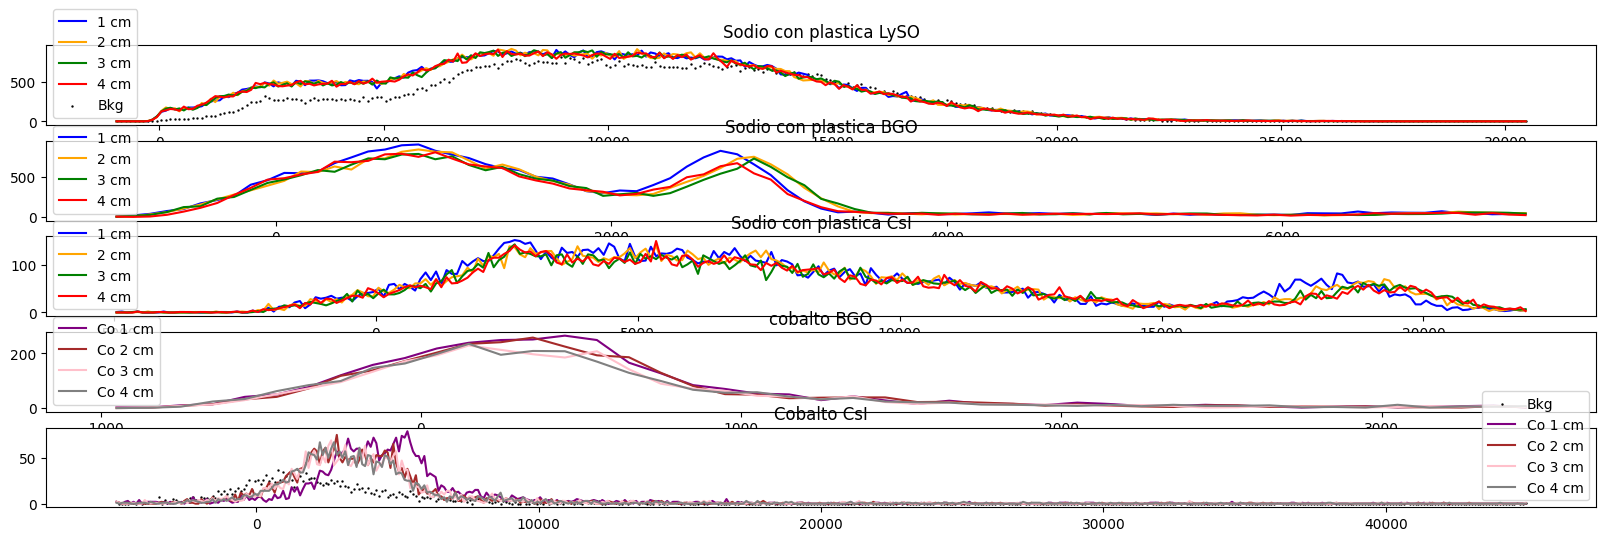

In [4]:
#spiego nome: sodio_lyso_1cm_plastica
# #prendo dati di LySO e fondo lyso
Na_L_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
bkg_L  = read_corretto(path = 'Dati/Parte 2/LySO/Bkg_55.5V.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO
Na_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
#prendo dati con CsI
Na_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Na_csi_4.txt', titles = ['ADC', 'Counts'])
#prendo dati BGO con cobalto
#BGO
Co_B_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_1.txt', titles = ['ADC', 'Counts'])
Co_B_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_2.txt', titles = ['ADC', 'Counts'])
Co_B_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_3.txt', titles = ['ADC', 'Counts'])
Co_B_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_bgo_4.txt', titles = ['ADC', 'Counts'])
#CsI
Co_C_1_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_p = read_corretto(path = 'Dati/Parte 2/Plastica/Co_csi_4.txt', titles = ['ADC', 'Counts'])
#fondo CsI
bkg_C  = read_corretto(path = 'Dati/Parte 2/CsI/Bkg_54.5V.txt', titles = ['ADC', 'Counts'])
#farò dei plot, non plotto tutti gli zeri finali però
Fig, axes = plt.subplots(5, 1, figsize = (20, 6))
start_index = 0
end_index_L = 380 - 65
end_index_B = 150 - 65
end_index_C = 335 - 65
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_p['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_p['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_p['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_p['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], bkg_L['Counts'][start_index:end_index_L], label = 'Bkg', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')
axes[2].set_title('Sodio con plastica CsI')
axes[2].plot(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].legend()
#Cobalto 
end_index_B = 110 - 65
axes[3].plot(Co_B_1_p['ADC'][start_index:end_index_B], Co_B_1_p['Counts'][start_index:end_index_B], label = 'Co 1 cm', color = 'purple')
axes[3].plot(Co_B_2_p['ADC'][start_index:end_index_B], Co_B_2_p['Counts'][start_index:end_index_B], label = 'Co 2 cm', color = 'brown')
axes[3].plot(Co_B_3_p['ADC'][start_index:end_index_B], Co_B_3_p['Counts'][start_index:end_index_B], label = 'Co 3 cm', color = 'pink')
axes[3].plot(Co_B_4_p['ADC'][start_index:end_index_B], Co_B_4_p['Counts'][start_index:end_index_B], label = 'Co 4 cm', color = 'gray')
axes[3].set_title('cobalto BGO')
axes[3].legend()
axes[4].set_title('Cobalto CsI')
start_index_C = 0
end_index_C = 600 - 65
axes[4].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[4].plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')
axes[4].plot(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C], label = 'Co 2 cm', color = 'brown')
axes[4].plot(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C], label = 'Co 3 cm', color = 'pink')
axes[4].plot(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C], label = 'Co 4 cm', color = 'gray')
axes[4].legend()

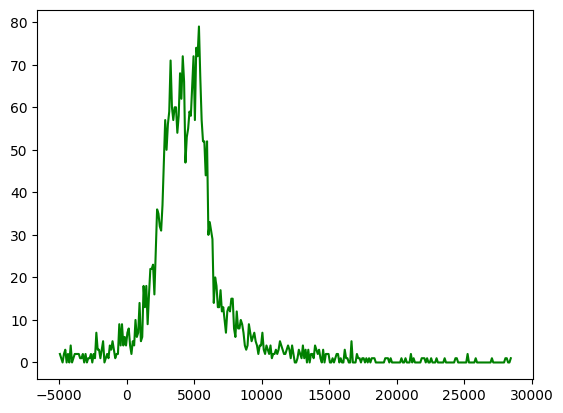

In [5]:
start_index_C = 0
end_index_C = 400 - 65
plt.plot(Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'green')
# plt.plot (Co_C_1_p['ADC'][start_index_C:end_index_C], Co_C_1_p['Counts'][start_index_C:end_index_C]-bkg_C['Counts'][start_index_C:end_index_C], label = 'Co 1 cm', color = 'purple')

## LySO

Text(0.5, 1.0, 'Sodio con plastica BGO')

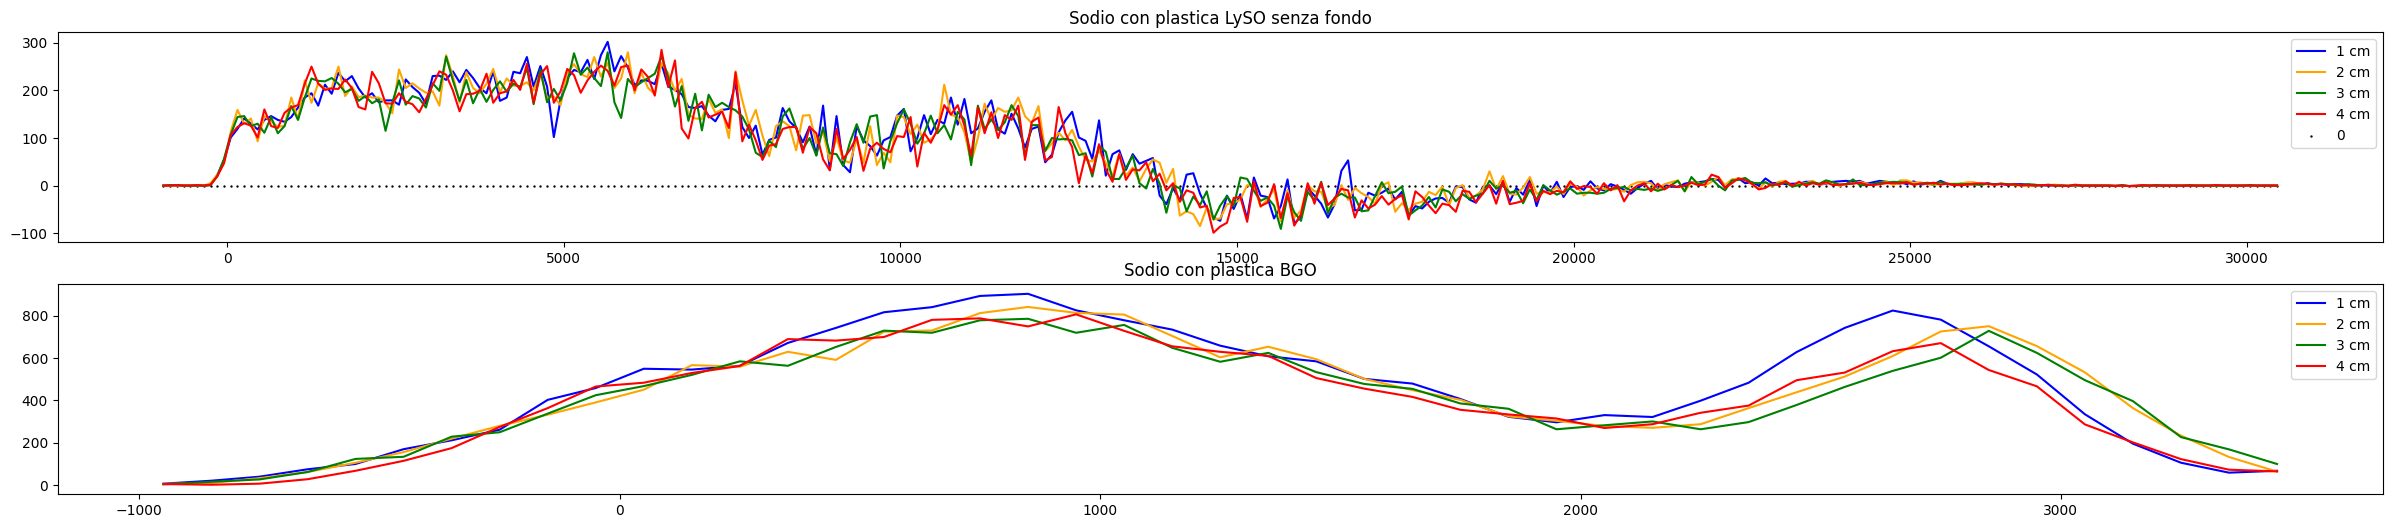

In [6]:
#non si vede una mazza con LySO, probabilmente è colpa del fondo, ora provo a toglierlo. e riplotto.
Na_L_1_nobkg_p = Na_L_1_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_p = Na_L_2_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_p = Na_L_3_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_p = Na_L_4_p['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
a = np.zeros(len(Na_L_1_nobkg_p))
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_p['ADC'][start_index:end_index_L], Na_L_1_nobkg_p, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_p['ADC'][start_index:end_index_L], Na_L_2_nobkg_p, label = '2 cm', color = 'orange')  
axes[0].plot(Na_L_3_p['ADC'][start_index:end_index_L], Na_L_3_nobkg_p, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_p['ADC'][start_index:end_index_L], Na_L_4_nobkg_p, label = '4 cm', color = 'red')
axes[0].scatter(bkg_L['ADC'][start_index:end_index_L], a, label = '0', color = 'black', s = 0.5)
axes[0].legend()
axes[0].set_title('Sodio con plastica LySO senza fondo')
axes[1].plot(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].legend()
axes[1].set_title('Sodio con plastica BGO')

#non si capisce comunque una mazza col LySO

## BGO

### Na

In [7]:
#1cm
start_index = 92 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_p['ADC'][start_index:end_index_B], Na_B_1_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_1_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 400, S = 400, a = 0, b = 0, c = 0)

s1 = vals[1]
mu1 = vals[0]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]
#2cm
start_index = 95 - 65
end_index_B = 115 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_p['ADC'][start_index:end_index_B], Na_B_2_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_2_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 700, a = 0, b = 0, c = 0 )
s2 = vals[1]
mu2 = vals[0]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]
#3cm
start_index = 97 - 65
end_index_B = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_p['ADC'][start_index:end_index_B], Na_B_3_p['Counts'][start_index:end_index_B],
                                   np.array(np.sqrt(Na_B_3_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
s3 = vals[1]
mu3 = vals[0]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]
#4 cm
start_index = 90 - 65
end_index_B = 127 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_p['ADC'][start_index:end_index_B], Na_B_4_p['Counts'][start_index:end_index_B], 
                                   np.array(np.sqrt(Na_B_4_p['Counts'][start_index:end_index_B])), gauss_pol2, mu = 3000, sigma = 300, S = 800, a = 0, b = 0, c = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.15 (χ²/ndof = 1.6)      │              Nfcn = 414              │
│ EDM = 1.91e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.687e3  │  0.006e3  │            │            │         │         │       │
│ 1 │ sigma │    253    │     6     │            │            │         │         │       │
│ 2 │ S     │    693    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.24e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.65   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   87e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         33.3           -7            4          124      -0.0766  11.52556e-6 │
│ sigma │           -7         38.1          -20          130      -0.1267  24.58164e-6 │
│     S │            4          -20          249       0.22e3      -0.1998  37.61464e-6 │
│     a │          124          130       0.22e3     4.79e+03      -3.4840 588.66454e-6 │
│     b │      -0.0766      -0.1267      -0.1998      -3.4840      0.00262   -451.57e-9 │
│     c │  11.52556e-6  24.58164e-6  37.61464e-6 588.66454e-6   -451.57e-9     7.86e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.36 (χ²/ndof = 1.3)      │              Nfcn = 405              │
│ EDM = 5.21e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.823e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    269    │     8     │            │            │         │         │       │
│ 2 │ S     │    644    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.34e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -0.72   │   0.09    │            │            │         │         │       │
│ 5 │ c     │ 0.100e-3  │ 0.015e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          45.8           -20             0           310        -0.177   25.20666e-6 │
│ sigma │           -20            69            20           390        -0.359   66.81719e-6 │
│     S │             0            20           270        0.80e3        -0.654  116.81218e-6 │
│     a │           310           390        0.80e3      1.52e+04       -10.781 1.78617882e-3 │
│     b │        -0.177        -0.359        -0.654       -10.781       0.00786   -1.31974e-6 │
│     c │   25.20666e-6   66.81719e-6  116.81218e-6 1.78617882e-3   -1.31974e-6      2.23e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 25.77 (χ²/ndof = 1.7)      │              Nfcn = 379              │
│ EDM = 2.88e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.853e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    259    │     9     │            │            │         │         │       │
│ 2 │ S     │    549    │    15     │            │            │         │         │       │
│ 3 │ a     │  1.02e3   │  0.11e3   │            │            │         │         │       │
│ 4 │ b     │   -0.48   │   0.06    │            │            │         │         │       │
│ 5 │ c     │   59e-6   │   9e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         79.4          -40          -30          700       -0.356  45.16677e-6 │
│ sigma │          -40         83.5           10         -490        0.198 -19.10706e-6 │
│     S │          -30           10          232      -0.46e3        0.183 -17.08317e-6 │
│     a │          700         -490      -0.46e3     1.31e+04       -7.033 941.03047e-6 │
│     b │       -0.356        0.198        0.183       -7.033      0.00391   -537.33e-9 │
│     c │  45.16677e-6 -19.10706e-6 -17.08317e-6 941.03047e-6   -537.33e-9     7.55e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.03 (χ²/ndof = 1.7)      │              Nfcn = 573              │
│ EDM = 4.08e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.718e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    237    │     6     │            │            │         │         │       │
│ 2 │ S     │    496    │    14     │            │            │         │         │       │
│ 3 │ a     │    961    │    24     │            │            │         │         │       │
│ 4 │ b     │  -0.429   │   0.013   │            │            │         │         │       │
│ 5 │ c     │  49.2e-6  │  1.7e-6   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          47.9           -10             0            40     -20.98e-3  2.5293827e-6 │
│ sigma │           -10          38.8           -40           -30      11.35e-3  -806.9744e-9 │
│     S │             0           -40           195       -0.03e3       9.56e-3  -725.9506e-9 │
│     a │            40           -30       -0.03e3           586    -301.48e-3 37.7370575e-6 │
│     b │     -20.98e-3      11.35e-3       9.56e-3    -301.48e-3      0.000163   -21.2627e-9 │
│     c │  2.5293827e-6  -806.9744e-9  -725.9506e-9 37.7370575e-6   -21.2627e-9      2.85e-12 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

In [8]:
x_B_p_N = np.array([1, 2, 3, 4])
y_B_p_N = np.array([s1*sig1, s2*sig2, s3*sig3, s4*sig4])
er_B_p_N = [prop_err_mol(s1, sig1, err_s1, err_sig1),
            prop_err_mol(s2, sig2, err_s2, err_sig2),
            prop_err_mol(s3, sig3, err_s3, err_sig3),
            prop_err_mol(s4, sig4, err_s4, err_sig4) ]

pars, vals, errs, *others = LS_fit([1,2,3,4], y_B_p_N, er_B_p_N, exp, a = 1, b = 0.1)
att_B_p_N = vals[1]
err_att_B_p_N = errs[1]

c2r_B_p_N = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.418 (χ²/ndof = 3.2)      │              Nfcn = 414              │
│ EDM = 1.21e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   208e3   │    9e3    │            │            │         │         │       │
│ 1 │ b    │   0.135   │   0.016   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.48e+07 119.54518 │
│ b │ 119.54518  0.000244 │
└───┴─────────────────────┘

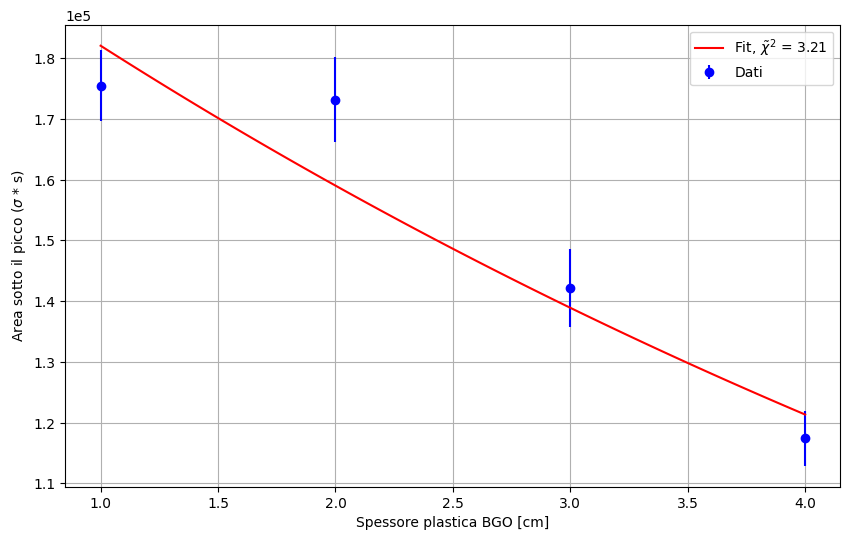

In [9]:
plt.figure(figsize = (10, 6))
plt.errorbar(x_B_p_N, y_B_p_N, yerr = er_B_p_N, fmt = 'o', label = 'Dati', color = 'blue')
x_fit = np.linspace(1, 4, 100)
plt.plot(x_fit, exp(x_fit, *vals), label = fr'Fit, $\tilde\chi^2$ = {c2r_B_p_N:.3g}', color = 'red')

plt.xlabel('Spessore plastica BGO [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.show()

In [10]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 2.1E+05 & 8.6E+03 \\ \hline
$ \b $ & 1.4E-01 & 1.6E-02 \\ \hline


### Co

In [11]:
# 1cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_1_p['ADC'][start_index_B:end_index_B], Co_B_1_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_1_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 100, sigma = 300, S = 400, a = 0, b = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

#2 cm
start_index_B = 4
end_index_B = 90 - 65
pars, vals, errs, *others = LS_fit(Co_B_2_p['ADC'][start_index_B:end_index_B], Co_B_2_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_2_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 250, a = 10, b = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]

#3 cm
start_index_B = 0
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_3_p['ADC'][start_index_B:end_index_B], Co_B_3_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_3_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 200, a = 10, b = 0)
s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_B = 4
end_index_B = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_4_p['ADC'][start_index_B:end_index_B], Co_B_4_p['Counts'][start_index_B:end_index_B],
                                   np.array(np.sqrt(Co_B_4_p['Counts'][start_index_B:end_index_B])), 
                                   gauss_pol1, mu = 280, sigma = 250, S = 200, a = 10, b = 0)
s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 74.94 (χ²/ndof = 2.5)      │              Nfcn = 176              │
│ EDM = 7.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    285    │     9     │            │            │         │         │       │
│ 1 │ sigma │    411    │     9     │            │            │         │         │       │
│ 2 │ S     │    254    │     6     │            │            │         │         │       │
│ 3 │ a     │    3.0    │    1.2    │            │            │         │         │       │
│ 4 │ b     │  5.0e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │       82.5          0         -0        2.2 -1.7530e-3 │
│ sigma │          0       86.7        -30       -7.7  2.5224e-3 │
│     S │         -0        -30       42.1        1.3  -575.9e-6 │
│     a │        2.2       -7.7        1.3       1.41  -425.7e-6 │
│     b │ -1.7530e-3  2.5224e-3  -575.9e-6  -425.7e-6    3.8e-07 │
└───────┴────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.16 (χ²/ndof = 1.1)      │              Nfcn = 173              │
│ EDM = 2.25e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    263    │    14     │            │            │         │         │       │
│ 1 │ sigma │    357    │    15     │            │            │         │         │       │
│ 2 │ S     │    233    │     8     │            │            │         │         │       │
│ 3 │ a     │    19     │     6     │            │            │         │         │       │
│ 4 │ b     │   0.010   │   0.004   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │        191    -0.10e3        -20         50 -43.793e-3 │
│ sigma │    -0.10e3        234         10        -80  42.303e-3 │
│     S │        -20         10       57.8        -20  11.514e-3 │
│     a │         50        -80        -20         42 -23.875e-3 │
│     b │ -43.793e-3  42.303e-3  11.514e-3 -23.875e-3   1.94e-05 │
└───────┴────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 109.1 (χ²/ndof = 3.6)      │              Nfcn = 184              │
│ EDM = 5.47e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    278    │    10     │            │            │         │         │       │
│ 1 │ sigma │    423    │    11     │            │            │         │         │       │
│ 2 │ S     │    211    │     6     │            │            │         │         │       │
│ 3 │ a     │    1.0    │    1.1    │            │            │         │         │       │
│ 4 │ b     │  3.3e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         103      0.02e3         -10         1.3 -1.21996e-3 │
│ sigma │      0.02e3         119         -40        -8.5  2.89284e-3 │
│     S │         -10         -40        35.5         1.3  -515.52e-6 │
│     a │         1.3        -8.5         1.3        1.19  -384.24e-6 │
│     b │ -1.21996e-3  2.89284e-3  -515.52e-6  -384.24e-6     2.7e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.16 (χ²/ndof = 1.8)      │              Nfcn = 201              │
│ EDM = 6.95e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    269    │    12     │            │            │         │         │       │
│ 1 │ sigma │    377    │    18     │            │            │         │         │       │
│ 2 │ S     │    192    │     7     │            │            │         │         │       │
│ 3 │ a     │    27     │     6     │            │            │         │         │       │
│ 4 │ b     │  -0.0075  │  0.0027   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │         mu      sigma          S          a          b │
├───────┼────────────────────────────────────────────────────────┤
│    mu │        146    -0.05e3        -20         23 -11.618e-3 │
│ sigma │    -0.05e3        339        -10        -84  39.220e-3 │
│     S │        -20        -10       49.6        -14   6.934e-3 │
│     a │         23        -84        -14       31.3 -14.837e-3 │
│     b │ -11.618e-3  39.220e-3   6.934e-3 -14.837e-3   7.27e-06 │
└───────┴────────────────────────────────────────────────────────┘

In [12]:
x_B_p_C = np.array([1, 2, 3, 4])
y_B_p_C = np.array([s1*sig1, s2*sig2, s3*sig3, s4*sig4])
er_B_p_C = [prop_err_mol(s1, sig1, err_s1, err_sig1),
            prop_err_mol(s2, sig2, err_s2, err_sig2),
            prop_err_mol(s3, sig3, err_s3, err_sig3),
            prop_err_mol(s4, sig4, err_s4, err_sig4)]

pars, vals, errs, *others = LS_fit(x_B_p_C, y_B_p_C, er_B_p_C, exp, a = 1, b = 0.1)
att_B_p_C = vals[1]
err_att_B_p_C = errs[1]

c2r_B_p_C = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.178 (χ²/ndof = 4.1)      │              Nfcn = 367              │
│ EDM = 5.56e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   113e3   │    5e3    │            │            │         │         │       │
│ 1 │ b    │   0.101   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.99e+07  97.1800 │
│ b │  97.1800 0.000396 │
└───┴───────────────────┘

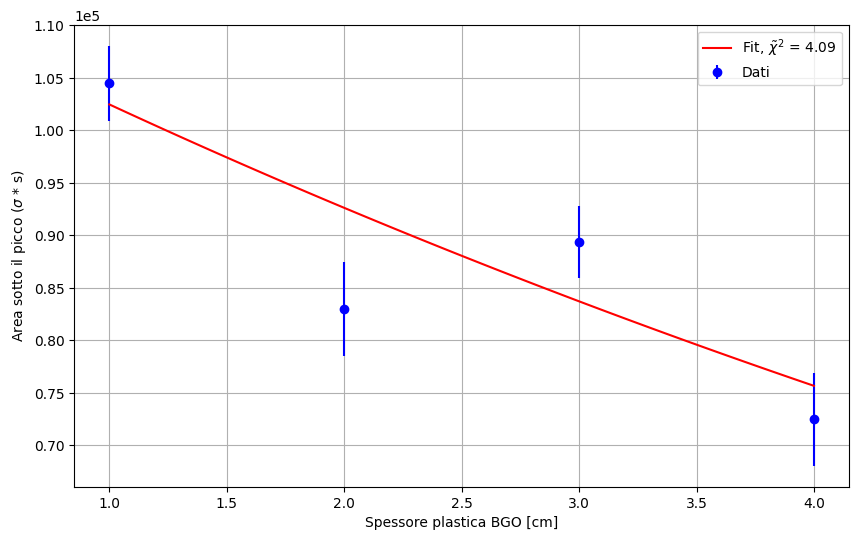

In [13]:
plt.figure(figsize = (10, 6))
plt.errorbar(x_B_p_C, y_B_p_C, yerr = er_B_p_C, fmt = 'o', label = 'Dati', color = 'blue')
x_fit = np.linspace(1, 4, 100)
plt.plot(x_fit, exp(x_fit, *vals), label = fr'Fit, $\tilde\chi^2$ = {c2r_B_p_C:.3g}', color = 'red')

plt.xlabel('Spessore plastica BGO [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

### Confronto

è la stessa cosa di sopra

In [14]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_p_C = vals[1]
err_att_B_p_C = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.178 (χ²/ndof = 4.1)      │              Nfcn = 367              │
│ EDM = 5.56e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   113e3   │    5e3    │            │            │         │         │       │
│ 1 │ b    │   0.101   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.99e+07  97.1800 │
│ b │  97.1800 0.000396 │
└───┴───────────────────┘

In [15]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 1.1E+05 & 5.5E+03 \\ \hline
$ \b $ & 1.0E-01 & 2.0E-02 \\ \hline


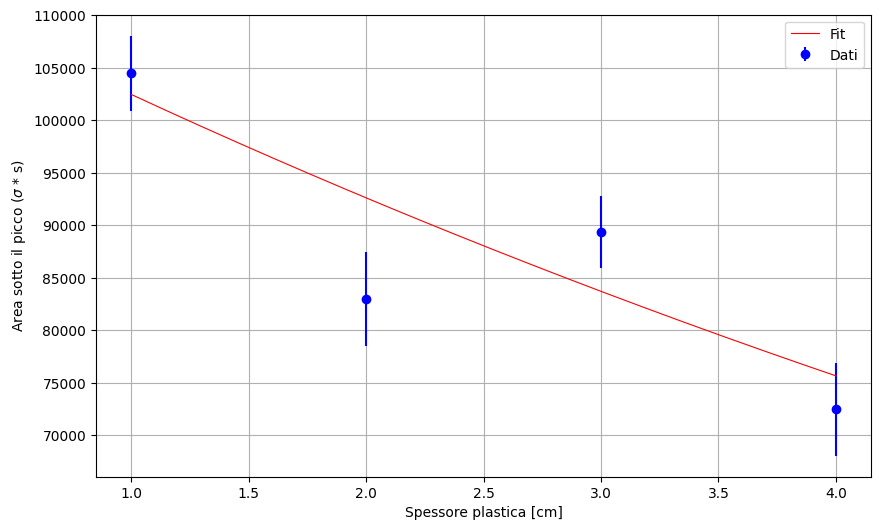

In [16]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

## CsI

### Na

In [17]:
# 1 cm
start_index = 250 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_1_p['ADC'][start_index:end_index_C], Na_C_1_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_2_p['ADC'][start_index:end_index_C], Na_C_2_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_3_p['ADC'][start_index:end_index_C], Na_C_3_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 270 - 65
end_index_C = 350 - 65
pars, vals, errs, *others = LS_fit(Na_C_4_p['ADC'][start_index:end_index_C], Na_C_4_p['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_p['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 110.5 (χ²/ndof = 1.2)      │              Nfcn = 213              │
│ EDM = 2.18e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.23e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │    966    │    31     │            │            │         │         │       │
│ 2 │ S     │   58.3    │    2.2    │            │            │         │         │       │
│ 3 │ a     │   33.6    │    2.6    │            │            │         │         │       │
│ 4 │ b     │ -1.28e-3  │  0.12e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      1.3e+03       -0.2e3            3           23 -1.131033e-3 │
│ sigma │       -0.2e3          940          -29          -23   886.965e-6 │
│     S │            3          -29         4.66           -1    21.146e-6 │
│     a │           23          -23           -1          6.5  -308.267e-6 │
│     b │ -1.131033e-3   886.965e-6    21.146e-6  -308.267e-6      1.5e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 72.31 (χ²/ndof = 1.0)      │              Nfcn = 215              │
│ EDM = 1.2e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.90e3  │  0.04e3   │            │            │         │         │       │
│ 1 │ sigma │    942    │    35     │            │            │         │         │       │
│ 2 │ S     │   54.9    │    2.1    │            │            │         │         │       │
│ 3 │ a     │    30     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.15e-3  │  0.19e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     1.45e+03       -0.5e3            4           61 -2.814769e-3 │
│ sigma │       -0.5e3     1.22e+03          -27          -66  2.739832e-3 │
│     S │            4          -27         4.52           -1    48.883e-6 │
│     a │           61          -66           -1         16.5  -753.545e-6 │
│     b │ -2.814769e-3  2.739832e-3    48.883e-6  -753.545e-6     3.48e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 66.64 (χ²/ndof = 0.9)      │              Nfcn = 237              │
│ EDM = 5.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.16e3  │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.06e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   47.3    │    1.9    │            │            │         │         │       │
│ 3 │ a     │    34     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.35e-3  │  0.19e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.09e+03       -0.8e3            3           85 -3.851720e-3 │
│ sigma │       -0.8e3     2.07e+03          -31          -88  3.480312e-3 │
│     S │            3          -31         3.72           -1    48.591e-6 │
│     a │           85          -88           -1           17  -761.152e-6 │
│     b │ -3.851720e-3  3.480312e-3    48.591e-6  -761.152e-6     3.47e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 81.08 (χ²/ndof = 1.1)      │              Nfcn = 246              │
│ EDM = 1.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  19.27e3  │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │   1000    │    50     │            │            │         │         │       │
│ 2 │ S     │   41.0    │    1.9    │            │            │         │         │       │
│ 3 │ a     │    40     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.55e-3  │  0.18e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.41e+03       -0.7e3            2           79 -3.639720e-3 │
│ sigma │       -0.7e3     2.03e+03          -28          -69  2.635568e-3 │
│     S │            2          -28         3.55           -1    51.831e-6 │
│     a │           79          -69           -1           16  -729.318e-6 │
│     b │ -3.639720e-3  2.635568e-3    51.831e-6  -729.318e-6     3.38e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

In [18]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_C_p_N = vals[1]
err_att_C_p_N = errs[1]

c2r_C_p_N = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.705 (χ²/ndof = 0.9)      │              Nfcn = 390              │
│ EDM = 6.76e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   63e3    │    4e3    │            │            │         │         │       │
│ 1 │ b    │   0.097   │   0.024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.52e+07  85.0660 │
│ b │  85.0660 0.000597 │
└───┴───────────────────┘

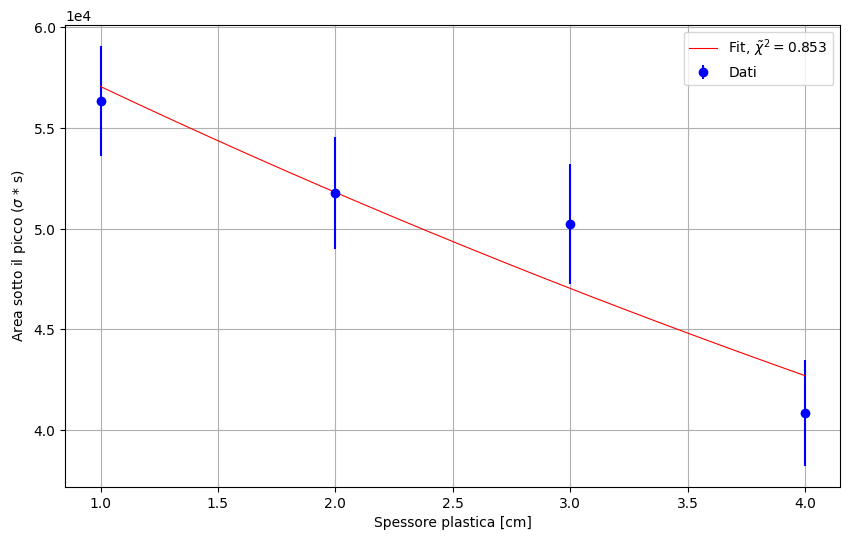

In [19]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = fr'Fit, $\tilde\chi^2 = {c2r_C_p_N:.3g}$', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.legend()

In [20]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 6.3E+04 & 3.9E+03 \\ \hline
$ \b $ & 9.7E-02 & 2.4E-02 \\ \hline


### Co

In [21]:
# 1 cm
start_index_C = 100 - 65
end_index_C = 200 - 65 # - bkg_C['Counts'][start_index_C:end_index_C]
y = (Co_C_1_p['Counts'][start_index_C:end_index_C])
pars, vals, errs, *others = LS_fit(Co_C_1_p['ADC'][start_index_C:end_index_C], y,
                                   np.array(np.sqrt(Na_C_1_p['Counts'][start_index_C:end_index_C])), gauss_cost, 
                                   mu = 4000, sigma = 200, S = 50, a = 0)
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_2_p['ADC'][start_index_C:end_index_C], Co_C_2_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_2_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]

# 3 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_3_p['ADC'][start_index_C:end_index_C], Co_C_3_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_3_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 100 - 65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit(Co_C_4_p['ADC'][start_index_C:end_index_C], Co_C_4_p['Counts'][start_index_C:end_index_C],
                                   np.array(np.sqrt(Co_C_4_p['Counts'][start_index_C:end_index_C])), gauss_pol1, 
                                   mu = 4000, sigma = 100, S = 40, a = 0, b = 0)
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_s4 = errs[1]
err_sig4 = errs[2]



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 40.41 (χ²/ndof = 0.4)      │              Nfcn = 137              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  4.32e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ sigma │  1.56e3   │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   64.9    │    2.7    │            │            │         │         │       │
│ 3 │ a     │    3.1    │    1.3    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │       mu    sigma        S        a │
├───────┼─────────────────────────────────────┤
│    mu │ 4.92e+03     -0e3       -8      6.8 │
│ sigma │     -0e3 6.56e+03      -53    -62.1 │
│     S │       -8      -53     7.17     -1.0 │
│     a │      6.8    -62.1     -1.0     1.64 │
└───────┴─────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 152.6 (χ²/ndof = 1.6)      │              Nfcn = 223              │
│ EDM = 1.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.20e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.64e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   55.1    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    2.4    │    0.8    │            │            │         │         │       │
│ 4 │ b     │ -0.03e-3  │  0.11e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.29e+03       -0.4e3         -1.1         16.5 -2.966577e-3 │
│ sigma │       -0.4e3     2.16e+03        -17.7        -26.5  1.350498e-3 │
│     S │         -1.1        -17.7         2.24         -0.2    12.882e-6 │
│     a │         16.5        -26.5         -0.2        0.673   -62.988e-6 │
│     b │ -2.966577e-3  1.350498e-3    12.882e-6   -62.988e-6     1.13e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 157.4 (χ²/ndof = 1.7)      │              Nfcn = 241              │
│ EDM = 6.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.26e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.65e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   53.6    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    1.8    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  0.01e-3  │  0.10e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.29e+03       -0.3e3         -2.7         15.1 -2.821744e-3 │
│ sigma │       -0.3e3     2.28e+03        -18.7        -26.5   1.28224e-3 │
│     S │         -2.7        -18.7         2.15         -0.1    11.081e-6 │
│     a │         15.1        -26.5         -0.1        0.621   -56.644e-6 │
│     b │ -2.821744e-3   1.28224e-3    11.081e-6   -56.644e-6     1.02e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.2 (χ²/ndof = 1.1)      │              Nfcn = 235              │
│ EDM = 0.000102 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.06e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.64e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   54.5    │    1.5    │            │            │         │         │       │
│ 3 │ a     │    1.2    │    0.7    │            │            │         │         │       │
│ 4 │ b     │  0.27e-3  │  0.10e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.18e+03       -0.2e3         -1.1         11.7 -2.613255e-3 │
│ sigma │       -0.2e3     2.19e+03        -19.9        -24.0   909.251e-6 │
│     S │         -1.1        -19.9         2.21         -0.1     4.618e-6 │
│     a │         11.7        -24.0         -0.1        0.534   -45.446e-6 │
│     b │ -2.613255e-3   909.251e-6     4.618e-6   -45.446e-6     9.84e-09 │
└───────┴──────────────────────────────────────────────────────────────────┘

### Confronto

In [22]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_C_p_C = vals[1]
err_att_C_p_C = errs[1]

c2r_C_p_C = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.495 (χ²/ndof = 0.7)      │              Nfcn = 428              │
│ EDM = 7.67e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   98e3    │    7e3    │            │            │         │         │       │
│ 1 │ b    │   0.028   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 4.26e+07 139.9474 │
│ b │ 139.9474 0.000514 │
└───┴───────────────────┘

In [23]:
for i in range(len(vals)):
    if i <= 1:
        print(f"$ \\{pars[i]} $ & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")
    else:
        print(f"{pars[i]} & {vals[i]:.1E} & {errs[i]:.1E} \\\\ \\hline")

$ \a $ & 9.8E+04 & 6.5E+03 \\ \hline
$ \b $ & 2.8E-02 & 2.3E-02 \\ \hline


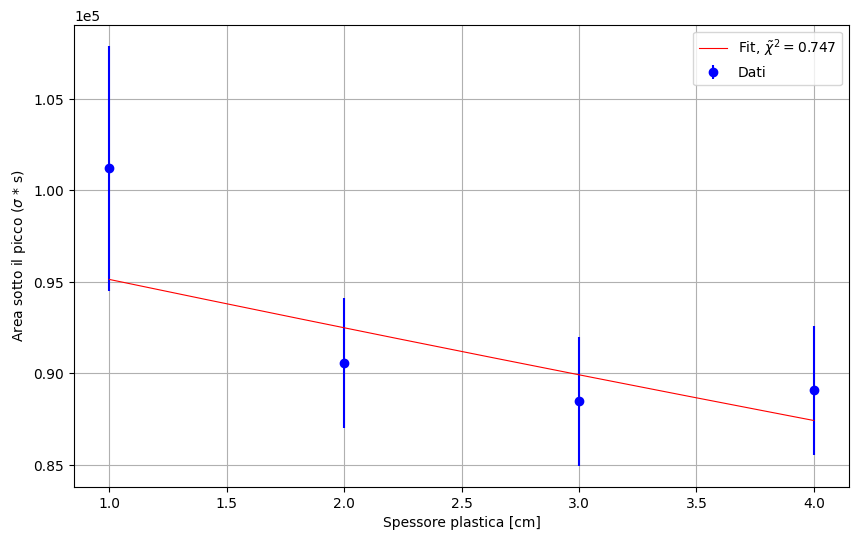

In [24]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = fr'Fit, $\tilde\chi^2 = {c2r_C_p_C:.3g}$', color = 'red', linewidth = 0.8)
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

0.09655287847499498 0.10097539522602951 0.09655287847499498 0.02819255123619066
0.024439945877987344 0.01989015716313096 0.024439945877987344 0.02266397834399596


<ErrorbarContainer object of 3 artists>

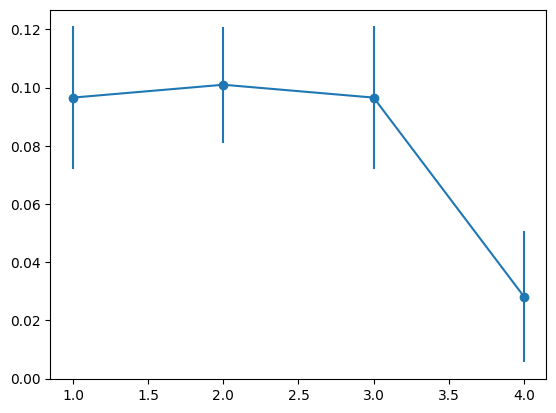

In [25]:
print(att_C_p_N, att_B_p_C, att_C_p_N, att_C_p_C)
print(err_att_C_p_N, err_att_B_p_C, err_att_C_p_N, err_att_C_p_C)
# Plotting the results
plt.errorbar([1,2,3,4], [att_C_p_N, att_B_p_C, att_C_p_N, att_C_p_C], yerr = [err_att_C_p_N, err_att_B_p_C, err_att_C_p_N, err_att_C_p_C], marker = 'o')

# Alluminio

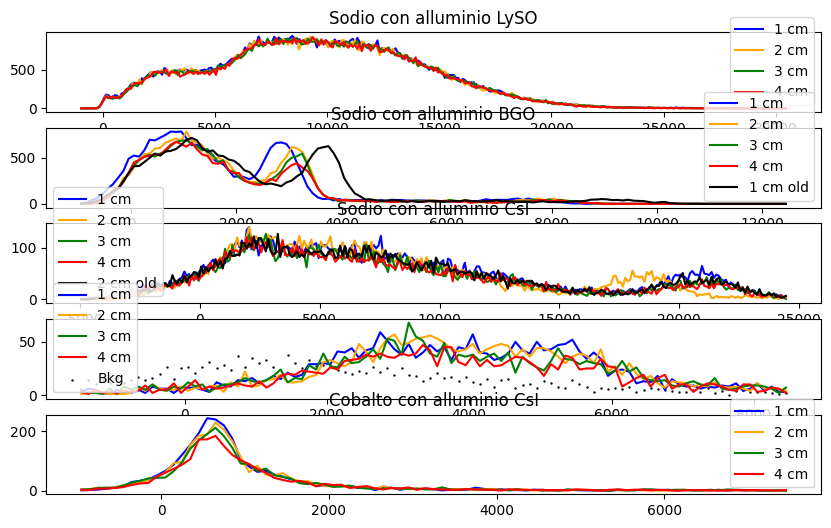

In [26]:
start_index = 0
#spiego nome: sodio_lyso_1cm_alluminio
#LySO

Na_L_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_1.txt', titles = ['ADC', 'Counts'])
Na_L_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_2.txt', titles = ['ADC', 'Counts'])
Na_L_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_3.txt', titles = ['ADC', 'Counts'])
Na_L_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_lyso_4.txt', titles = ['ADC', 'Counts'])
#BGO
Na_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Na_B_1_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_bgo_1(old).txt', titles = ['ADC', 'Counts'])
#CsI
Na_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_1.txt', titles = ['ADC', 'Counts'])
Na_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2.txt', titles = ['ADC', 'Counts'])
Na_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_3.txt', titles = ['ADC', 'Counts'])
Na_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_4.txt', titles = ['ADC', 'Counts'])
Na_C_2_al_old = read_corretto(path = 'Dati/Parte 2/Alluminio/Na_csi_2(old).txt', titles = ['ADC', 'Counts'])
#Cobalto CsI
Co_C_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_1.txt', titles = ['ADC', 'Counts'])
Co_C_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_2.txt', titles = ['ADC', 'Counts'])
Co_C_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_3.txt', titles = ['ADC', 'Counts'])
Co_C_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_csi_4.txt', titles = ['ADC', 'Counts'])
#Cobalto BGO
Co_B_1_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_1.txt', titles = ['ADC', 'Counts'])
Co_B_2_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_2.txt', titles = ['ADC', 'Counts'])
Co_B_3_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_3.txt', titles = ['ADC', 'Counts'])
Co_B_4_al = read_corretto(path = 'Dati/Parte 2/Alluminio/Co_bgo_4.txt', titles = ['ADC', 'Counts'])
Fig, axes = plt.subplots(5, 1, figsize = (10, 6))
end_index_L = 380-65
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_al['Counts'][start_index:end_index_L], label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_al['Counts'][start_index:end_index_L], label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_al['Counts'][start_index:end_index_L], label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_al['Counts'][start_index:end_index_L], label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO')
end_index_B = 200 - 65
axes[1].plot(Na_B_1_al['ADC'][start_index:end_index_B], Na_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[1].plot(Na_B_2_al['ADC'][start_index:end_index_B], Na_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[1].plot(Na_B_3_al['ADC'][start_index:end_index_B], Na_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[1].plot(Na_B_4_al['ADC'][start_index:end_index_B], Na_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[1].plot(Na_B_1_al_old['ADC'][start_index:end_index_B], Na_B_1_al_old['Counts'][start_index:end_index_B], label = '1 cm old', color = 'black')
axes[1].legend()
axes[1].set_title('Sodio con alluminio BGO')
axes[2].set_title('Sodio con alluminio CsI')
end_index_C = 360 - 65
axes[2].plot(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[2].plot(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[2].plot(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[2].plot(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[2].plot(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C], label = '2 cm old', color = 'black')
axes[2].legend()
start_index = 35
end_index_C = 200 - 65
axes[3].plot(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
axes[3].plot(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
axes[3].plot(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
axes[3].plot(Co_C_4_al['ADC'][start_index:end_index_C], Co_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
axes[3].scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
axes[3].legend()
start_index = 0
end_index_B = 150 - 65
axes[4].set_title('Cobalto con alluminio CsI')
axes[4].plot(Co_B_1_al['ADC'][start_index:end_index_B], Co_B_1_al['Counts'][start_index:end_index_B], label = '1 cm', color = 'blue')
axes[4].plot(Co_B_2_al['ADC'][start_index:end_index_B], Co_B_2_al['Counts'][start_index:end_index_B], label = '2 cm', color = 'orange')
axes[4].plot(Co_B_3_al['ADC'][start_index:end_index_B], Co_B_3_al['Counts'][start_index:end_index_B], label = '3 cm', color = 'green')
axes[4].plot(Co_B_4_al['ADC'][start_index:end_index_B], Co_B_4_al['Counts'][start_index:end_index_B], label = '4 cm', color = 'red')
axes[4].legend()
# axes[4].scatter(bkg_C['ADC'][start_index:end_index_B], bkg_C['Counts'][start_index:end_index_B], label = 'Bkg', color = 'black', s = 0.5)

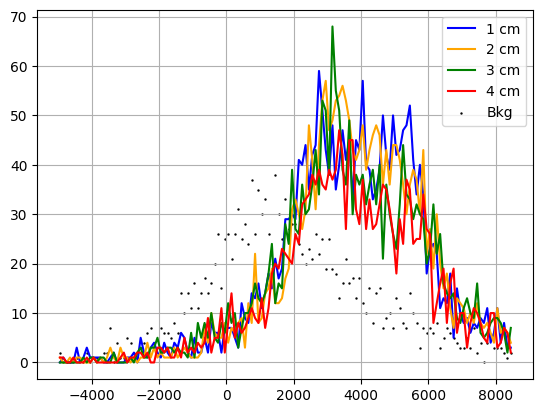

In [27]:
plt.plot(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C], label = '1 cm', color = 'blue')
plt.plot(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C], label = '2 cm', color = 'orange')
plt.plot(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C], label = '3 cm', color = 'green')
plt.plot(Co_C_4_al['ADC'][start_index:end_index_C], Co_C_4_al['Counts'][start_index:end_index_C], label = '4 cm', color = 'red')
plt.scatter(bkg_C['ADC'][start_index:end_index_C], bkg_C['Counts'][start_index:end_index_C], label = 'Bkg', color = 'black', s = 0.5)
plt.legend()
plt.grid()

## LySO

Text(0.5, 1.0, 'Sodio con alluminio LySO senza fondo')

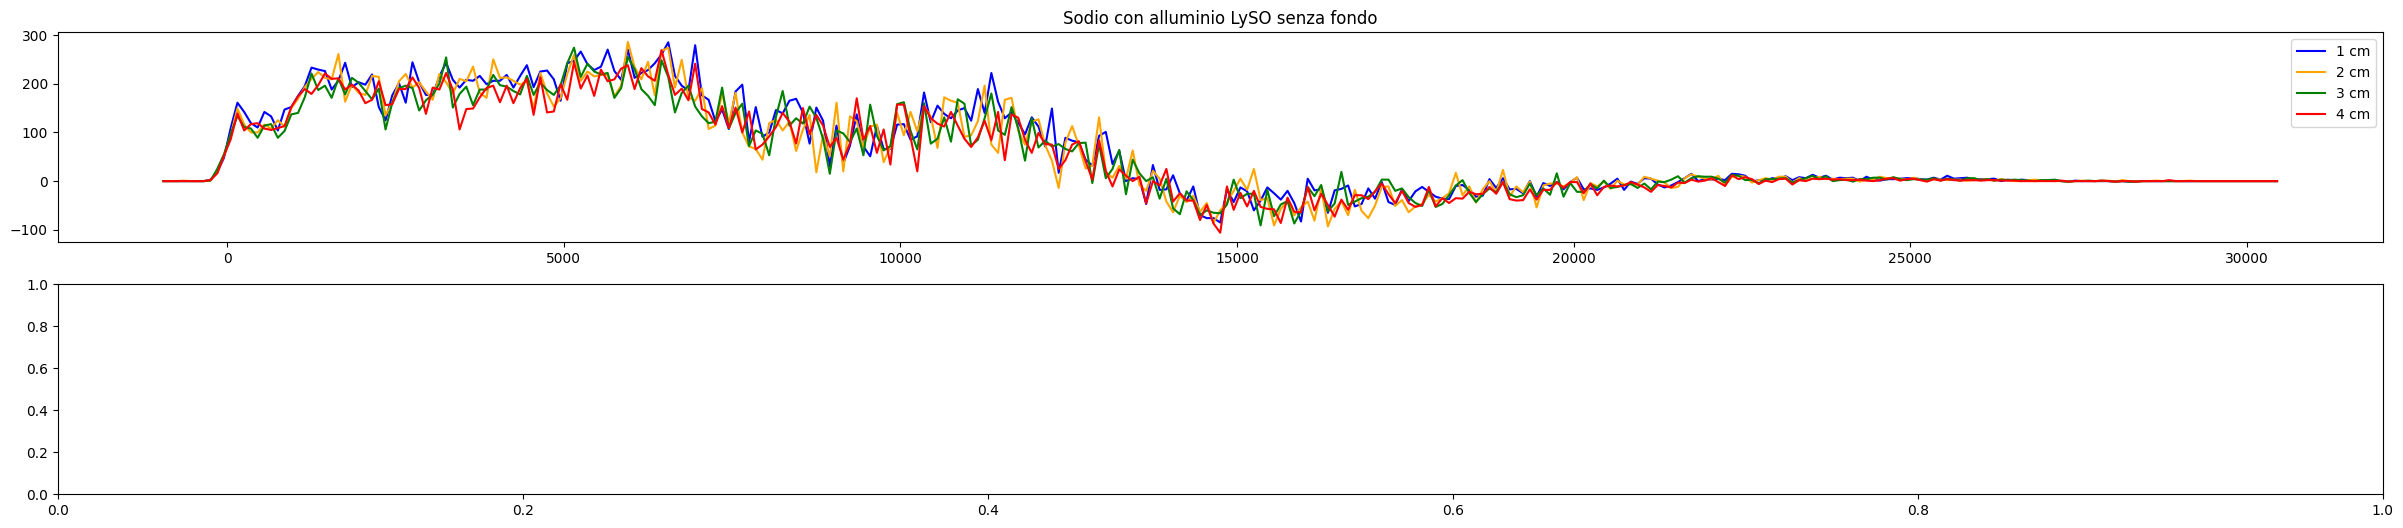

In [28]:
#tolgo sempre il fondo a lyso
Na_L_1_nobkg_al = Na_L_1_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_2_nobkg_al = Na_L_2_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_3_nobkg_al = Na_L_3_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Na_L_4_nobkg_al = Na_L_4_al['Counts'][start_index:end_index_L] - bkg_L['Counts'][start_index:end_index_L]
Fig, axes = plt.subplots(2, 1, figsize = (30, 6))
axes[0].plot(Na_L_1_al['ADC'][start_index:end_index_L], Na_L_1_nobkg_al, label = '1 cm', color = 'blue')
axes[0].plot(Na_L_2_al['ADC'][start_index:end_index_L], Na_L_2_nobkg_al, label = '2 cm', color = 'orange')
axes[0].plot(Na_L_3_al['ADC'][start_index:end_index_L], Na_L_3_nobkg_al, label = '3 cm', color = 'green')
axes[0].plot(Na_L_4_al['ADC'][start_index:end_index_L], Na_L_4_nobkg_al, label = '4 cm', color = 'red')
axes[0].legend()
axes[0].set_title('Sodio con alluminio LySO senza fondo')
#pure questo fa schifo!

## BGO

### Na

In [29]:
si1 = 99 - 65
ei1 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_al['ADC'][si1 : ei1], Na_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Na_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si2 = 94 - 65
ei2 = 125 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_al['ADC'][si2 : ei2], Na_B_2_al['Counts'][si2 : ei2], np.array(np.sqrt(Na_B_2_al['Counts'][si2 : ei2])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si3 = 97 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_al['ADC'][si3 : ei], Na_B_3_al['Counts'][si3 : ei], np.array(np.sqrt(Na_B_3_al['Counts'][si3 : ei])),
                                      gauss_pol3, mu = 4000, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si4 = 96 - 65
ei = 130 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_al['ADC'][si4 : ei], Na_B_4_al['Counts'][si4 : ei], np.array(np.sqrt(Na_B_4_al['Counts'][si4 : ei])),
                                      gauss_pol3, mu = 3500, sigma = 400, S = 400, b = 0, c = 0, d = 0, a = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.09 (χ²/ndof = 1.0)      │              Nfcn = 544              │
│ EDM = 2.57e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.864e3  │  0.014e3  │            │            │         │         │       │
│ 1 │ sigma │    285    │    13     │            │            │         │         │       │
│ 2 │ S     │    593    │    29     │            │            │         │         │       │
│ 3 │ a     │   1.9e3   │   0.5e3   │            │            │         │         │       │
│ 4 │ b     │   -1.29   │   0.34    │            │            │         │         │       │
│ 5 │ c     │  0.30e-3  │  0.08e-3  │            │            │         │         │       │
│ 6 │ d     │  -23e-9   │   7e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │               205           -0.15e3           -0.30e3            5.39e3             -3.39        701.713e-6   -47.79234056e-9 │
│ sigma │           -0.15e3               177            0.26e3           -3.74e3              2.06       -357.600e-6    18.73949557e-9 │
│     S │           -0.30e3            0.26e3               832            -8.7e3              4.92       -883.030e-6    48.94730029e-9 │
│     a │            5.39e3           -3.74e3            -8.7e3          2.29e+05           -158.64      36.545073e-3 -2.79811180265e-6 │
│     b │             -3.39              2.06              4.92           -158.64             0.114        -27.037e-6     2.13402062e-9 │
│     c │        701.713e-6       -357.600e-6       -883.030e-6      36.545073e-3        -27.037e-6          6.62e-09       -536.43e-15 │
│     d │   -47.79234056e-9    18.73949557e-9    48.94730029e-9 -2.79811180265e-6     2.13402062e-9       -536.43e-15          4.45e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.92 (χ²/ndof = 1.5)      │              Nfcn = 546              │
│ EDM = 1.92e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.111e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │     9     │            │            │         │         │       │
│ 2 │ S     │    526    │    15     │            │            │         │         │       │
│ 3 │ a     │  1.57e3   │  0.27e3   │            │            │         │         │       │
│ 4 │ b     │   -0.97   │   0.24    │            │            │         │         │       │
│ 5 │ c     │  0.20e-3  │  0.07e-3  │            │            │         │         │       │
│ 6 │ d     │  -14e-9   │   6e-9    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              51.8               -30               -10              -600              0.58       -171.204e-6    15.76438042e-9 │
│ sigma │               -30              78.4                10            1.57e3             -1.45        411.312e-6   -36.77219102e-9 │
│     S │               -10                10               225            2.07e3             -1.90        536.470e-6   -48.09436221e-9 │
│     a │              -600            1.57e3            2.07e3          7.08e+04            -64.42      18.161464e-3 -1.62777992021e-6 │
│     b │              0.58             -1.45             -1.90            -64.42            0.0588        -16.610e-6     1.49130894e-9 │
│     c │       -171.204e-6        411.312e-6        536.470e-6      18.161464e-3        -16.610e-6           4.7e-09       -422.79e-15 │
│     d │    15.76438042e-9   -36.77219102e-9   -48.09436221e-9 -1.62777992021e-6     1.49130894e-9       -422.79e-15          3.81e-17 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 41.77 (χ²/ndof = 1.6)      │              Nfcn = 591              │
│ EDM = 2.8e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.139e3  │  0.008e3  │            │            │         │         │       │
│ 1 │ sigma │    254    │     8     │            │            │         │         │       │
│ 2 │ S     │    452    │    13     │            │            │         │         │       │
│ 3 │ a     │  1.41e3   │  0.17e3   │            │            │         │         │       │
│ 4 │ b     │   -0.84   │   0.14    │            │            │         │         │       │
│ 5 │ c     │  0.17e-3  │  0.04e-3  │            │            │         │         │       │
│ 6 │ d     │ -11.4e-9  │  3.2e-9   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              57.1               -20                10               150            -0.076        11.8156e-6   -515.191577e-12 │
│ sigma │               -20              62.7               -20               460            -0.435       121.3795e-6  -10.485412535e-9 │
│     S │                10               -20               170            0.67e3            -0.584       156.7091e-6  -13.283549452e-9 │
│     a │               150               460            0.67e3          3.01e+04           -24.757      6.4207277e-3 -532.924908878e-9 │
│     b │            -0.076            -0.435            -0.584           -24.757            0.0206        -5.3771e-6    448.498359e-12 │
│     c │        11.8156e-6       121.3795e-6       156.7091e-6      6.4207277e-3        -5.3771e-6          1.41e-09      -118.108e-15 │
│     d │   -515.191577e-12  -10.485412535e-9  -13.283549452e-9 -532.924908878e-9    448.498359e-12      -118.108e-15          9.92e-18 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.95 (χ²/ndof = 1.3)      │              Nfcn = 562              │
│ EDM = 3.38e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.141e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    268    │    10     │            │            │         │         │       │
│ 2 │ S     │    346    │    12     │            │            │         │         │       │
│ 3 │ a     │  1.19e3   │  0.16e3   │            │            │         │         │       │
│ 4 │ b     │   -0.68   │   0.13    │            │            │         │         │       │
│ 5 │ c     │ 0.131e-3  │ 0.035e-3  │            │            │         │         │       │
│ 6 │ d     │  -8.5e-9  │  2.9e-9   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                mu             sigma                 S                 a                 b                 c                 d │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │              86.3               -30                 0                90            -0.026        -1.3152e-6    580.142917e-12 │
│ sigma │               -30               101           -0.01e3            0.65e3            -0.606       166.0216e-6  -14.154971444e-9 │
│     S │                 0           -0.01e3               142            0.69e3            -0.611       163.8060e-6  -13.831587310e-9 │
│     a │                90            0.65e3            0.69e3          2.45e+04           -20.458      5.3377168e-3 -443.632719400e-9 │
│     b │            -0.026            -0.606            -0.611           -20.458            0.0173        -4.5324e-6    378.326960e-12 │
│     c │        -1.3152e-6       166.0216e-6       163.8060e-6      5.3377168e-3        -4.5324e-6          1.19e-09      -100.054e-15 │
│     d │    580.142917e-12  -14.154971444e-9  -13.831587310e-9 -443.632719400e-9    378.326960e-12      -100.054e-15           8.4e-18 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

2863.571753709451 3111.0803376683307 3139.3641077655493 3140.9988370368073


In [30]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

c2r_B_a_N = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.1071 (χ²/ndof = 0.1)     │              Nfcn = 391              │
│ EDM = 4.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.210e6  │  0.015e6  │            │            │         │         │       │
│ 1 │ b    │   0.202   │   0.025   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.17e+08 342.0073 │
│ b │ 342.0073 0.000613 │
└───┴───────────────────┘

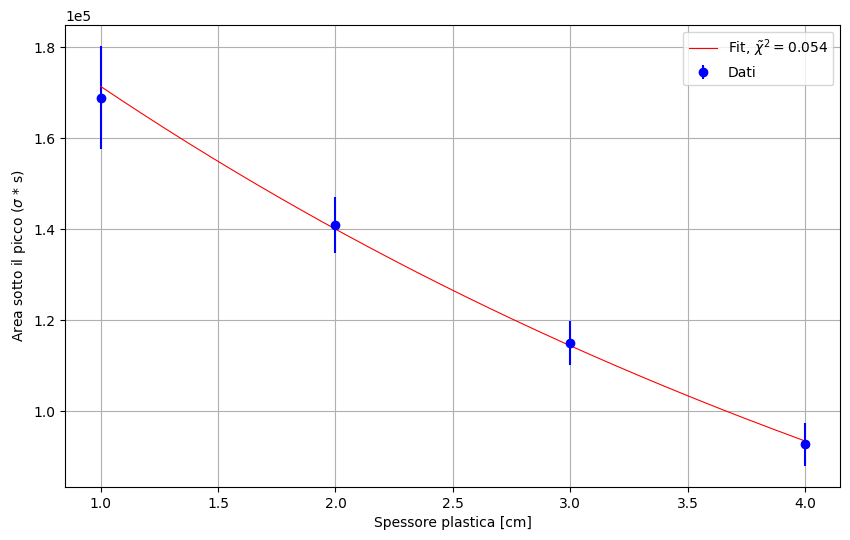

In [31]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
             yerr = [prop_err_mol(a1, sig1, er_a1, er_sig1),
                        prop_err_mol(a2, sig2, er_a2, er_sig2),
                        prop_err_mol(a3, sig3, er_a3, er_sig3),
                        prop_err_mol(a4, sig4, er_a4, er_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = fr'Fit, $\tilde\chi^2 = {c2r_B_a_N:.3f}$', color = 'red', linewidth = 0.8)
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Co

In [32]:
si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_1_al['ADC'][si1 : ei1], Co_B_1_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_1_al['Counts'][si1 : ei1])),
                                   gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu1 = vals[0]
sig1 = vals[1]
a1 = vals[2]
er_sig1 = errs[1]
er_a1 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_2_al['ADC'][si1 : ei1], Co_B_2_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_2_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu2 = vals[0]
sig2 = vals[1]
a2 = vals[2]
er_sig2 = errs[1]
er_a2 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_3_al['ADC'][si1 : ei1], Co_B_3_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_3_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu3 = vals[0]  
sig3 = vals[1]
a3 = vals[2]
er_sig3 = errs[1]
er_a3 = errs[2]

si1 = 65 - 65
ei1 = 100 - 65
pars, vals, errs, *others = LS_fit(Co_B_4_al['ADC'][si1 : ei1], Co_B_4_al['Counts'][si1 : ei1], np.array(np.sqrt(Co_B_4_al['Counts'][si1 : ei1])),
                                      gauss_pol1, mu = 500, sigma = 300, S = 200, a = 0, b = 0)
mu4 = vals[0]
sig4 = vals[1]
a4 = vals[2]
er_sig4 = errs[1]
er_a4 = errs[2]

# print(mu1, mu2, mu3, mu4)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.8 (χ²/ndof = 3.5)      │              Nfcn = 157              │
│ EDM = 0.000123 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    598    │    10     │            │            │         │         │       │
│ 1 │ sigma │    399    │    13     │            │            │         │         │       │
│ 2 │ S     │    187    │     7     │            │            │         │         │       │
│ 3 │ a     │    6.0    │    0.7    │            │            │         │         │       │
│ 4 │ b     │  4.2e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         110      0.02e3         -10        -0.3 -1.06062e-3 │
│ sigma │      0.02e3         178         -60        -4.6 -1.13573e-3 │
│     S │         -10         -60        45.6         0.9    79.72e-6 │
│     a │        -0.3        -4.6         0.9       0.485    65.35e-6 │
│     b │ -1.06062e-3 -1.13573e-3    79.72e-6    65.35e-6    2.47e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 113.2 (χ²/ndof = 3.8)      │              Nfcn = 157              │
│ EDM = 0.000107 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    607    │    11     │            │            │         │         │       │
│ 1 │ sigma │    404    │    15     │            │            │         │         │       │
│ 2 │ S     │    169    │     6     │            │            │         │         │       │
│ 3 │ a     │    6.9    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  4.4e-3   │  0.5e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         129      0.03e3         -10        -0.5 -1.31225e-3 │
│ sigma │      0.03e3         213         -70        -5.6 -1.32114e-3 │
│     S │         -10         -70        41.4         0.9    86.82e-6 │
│     a │        -0.5        -5.6         0.9       0.586    53.22e-6 │
│     b │ -1.31225e-3 -1.32114e-3    86.82e-6    53.22e-6    2.75e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.4 (χ²/ndof = 3.4)      │              Nfcn = 168              │
│ EDM = 3.69e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    645    │    13     │            │            │         │         │       │
│ 1 │ sigma │    417    │    17     │            │            │         │         │       │
│ 2 │ S     │    152    │     6     │            │            │         │         │       │
│ 3 │ a     │    8.7    │    1.0    │            │            │         │         │       │
│ 4 │ b     │  2.2e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         159      0.05e3         -10        -0.4 -1.76554e-3 │
│ sigma │      0.05e3         286         -70        -9.5  -369.89e-6 │
│     S │         -10         -70        36.8         1.2    16.34e-6 │
│     a │        -0.4        -9.5         1.2        1.05  -146.90e-6 │
│     b │ -1.76554e-3  -369.89e-6    16.34e-6  -146.90e-6    3.27e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 51.66 (χ²/ndof = 1.7)      │              Nfcn = 156              │
│ EDM = 8.63e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    632    │    13     │            │            │         │         │       │
│ 1 │ sigma │    420    │    14     │            │            │         │         │       │
│ 2 │ S     │    142    │     5     │            │            │         │         │       │
│ 3 │ a     │    6.9    │    0.8    │            │            │         │         │       │
│ 4 │ b     │  3.9e-3   │  0.6e-3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         171      0.03e3          -5        -0.2 -1.94405e-3 │
│ sigma │      0.03e3         206         -46        -6.3 -1.03426e-3 │
│     S │          -5         -46        27.6         0.4   -58.87e-6 │
│     a │        -0.2        -6.3         0.4       0.705     2.85e-6 │
│     b │ -1.94405e-3 -1.03426e-3   -58.87e-6     2.85e-6     3.1e-07 │
└───────┴─────────────────────────────────────────────────────────────┘

In [33]:
pars, vals, errs, *others = LS_fit([1,2,3,4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
                                            [prop_err_mol(a1, sig1, er_a1, er_sig1),
                                             prop_err_mol(a2, sig2, er_a2, er_sig2),
                                             prop_err_mol(a3, sig3, er_a3, er_sig3),
                                             prop_err_mol(a4, sig4, er_a4, er_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

c2r_B_a_C = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.03267 (χ²/ndof = 0.0)    │              Nfcn = 393              │
│ EDM = 5.52e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   80e3    │    5e3    │            │            │         │         │       │
│ 1 │ b    │   0.076   │   0.023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.42e+07 100.7645 │
│ b │ 100.7645 0.000511 │
└───┴───────────────────┘

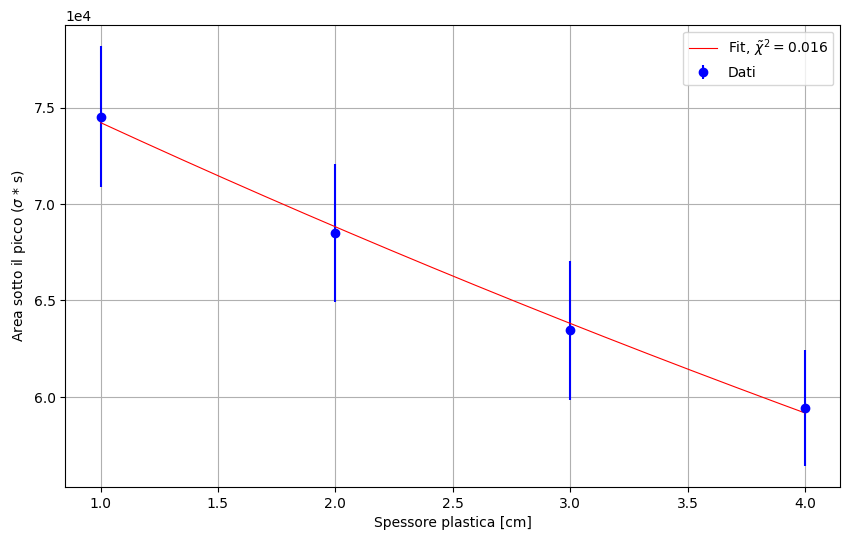

In [34]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [a1*sig1, a2*sig2, a3*sig3, a4*sig4], 
             yerr = [prop_err_mol(a1, sig1, er_a1, er_sig1),
                        prop_err_mol(a2, sig2, er_a2, er_sig2),
                        prop_err_mol(a3, sig3, er_a3, er_sig3),
                        prop_err_mol(a4, sig4, er_a4, er_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = fr'Fit, $\tilde\chi^2 = {c2r_B_a_C:.3f}$', color = 'red', linewidth = 0.8)
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

## CsI

### Na

In [35]:
# 1 cm
start_index = 280 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_1_al['ADC'][start_index:end_index_C], Na_C_1_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_1_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 22000, sigma = 500, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_S1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 260 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al['ADC'][start_index:end_index_C], Na_C_2_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, limits = [['S', (0, None)]])
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_S2 = errs[1]
err_sig2 = errs[2]

#2 cm old
start_index = 270 - 65
end_index_C = 370 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_2_al_old['ADC'][start_index:end_index_C], Na_C_2_al_old['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_2_al_old['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 40, a = 80, b = 0, limits = [['S', (0, None)]])
mu2_old = vals[0]
s2_old = vals[1]
sig2_old = vals[2]
err_S2_old = errs[1]
err_sig2_old = errs[2]

# 3 cm
start_index = 285 - 65
end_index_C = 360 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_3_al['ADC'][start_index:end_index_C], Na_C_3_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_3_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 19000, sigma = 500, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_S3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 275 - 65
end_index_C = 380 - 65
pars, vals, errs, *others = LS_fit_lims(Na_C_4_al['ADC'][start_index:end_index_C], Na_C_4_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Na_C_4_al['Counts'][start_index:end_index_C])), gauss_pol2, 
                                   mu = 21000, sigma = vals[1], S = 40, a = 80, b = -0.006, c= 0, limits = [['sigma', (0, None)]])
mu4 = vals[0]
s4 = vals[1]
sig4 = vals[2]
err_S4 = errs[1]
err_sig4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 64.4 (χ²/ndof = 0.8)       │              Nfcn = 255              │
│ EDM = 9.76e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.80e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.23e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   42.4    │    1.7    │            │            │         │         │       │
│ 3 │ a     │    35     │     4     │            │            │         │         │       │
│ 4 │ b     │ -1.25e-3  │  0.15e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.72e+03       -0.8e3         -1.1           82 -3.449590e-3 │
│ sigma │       -0.8e3     2.69e+03        -28.9          -79  2.725129e-3 │
│     S │         -1.1        -28.9         2.94         -1.0    40.101e-6 │
│     a │           82          -79         -1.0         12.8  -531.088e-6 │
│     b │ -3.449590e-3  2.725129e-3    40.101e-6  -531.088e-6     2.24e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 113.7 (χ²/ndof = 1.1)      │              Nfcn = 267              │
│ EDM = 3.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  18.50e3  │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.12e3   │  0.05e3   │            │            │         │         │       │
│ 2 │ S     │   38.5    │    1.7    │            │            │         │         │       │
│ 3 │ a     │   24.6    │    2.8    │            │            │         │         │       │
│ 4 │ b     │ -0.89e-3  │  0.12e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      2.7e+03       -0.9e3          1.3           54 -2.330295e-3 │
│ sigma │       -0.9e3      2.3e+03        -23.8          -76  3.094933e-3 │
│     S │          1.3        -23.8         2.84         -1.0    39.464e-6 │
│     a │           54          -76         -1.0         7.86  -336.287e-6 │
│     b │ -2.330295e-3  3.094933e-3    39.464e-6  -336.287e-6     1.46e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.9 (χ²/ndof = 1.1)      │              Nfcn = 277              │
│ EDM = 7.89e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  20.96e3  │  0.07e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.41e3  │  0.07e3   │            │            │         │         │       │
│ 2 │ S     │   30.2    │    1.4    │            │            │         │         │       │
│ 3 │ a     │   33.5    │    2.6    │            │            │         │         │       │
│ 4 │ b     │ -1.24e-3  │  0.11e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │      4.7e+03          0e3         -4.9           76 -3.504357e-3 │
│ sigma │          0e3     4.35e+03         25.2           31  -338.997e-6 │
│     S │         -4.9         25.2         1.87         -0.6    22.193e-6 │
│     a │           76           31         -0.6         6.62  -284.401e-6 │
│     b │ -3.504357e-3  -338.997e-6    22.193e-6  -284.401e-6     1.28e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 93.44 (χ²/ndof = 1.3)      │              Nfcn = 343              │
│ EDM = 1.76e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.11e3  │  0.11e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.67e3  │  0.16e3   │            │            │         │         │       │
│ 2 │ S     │   27.2    │    1.7    │            │            │         │         │       │
│ 3 │ a     │    32     │     6     │            │            │         │         │       │
│ 4 │ b     │ -1.36e-3  │  0.27e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     1.16e+04     -0.003e6         19.2          455 -23.27931e-3 │
│ sigma │     -0.003e6      2.7e+04       -163.9           53  11.41479e-3 │
│     S │         19.2       -163.9         3.06         -1.2    -63.17e-6 │
│     a │          455           53         -1.2         30.3  -1.38174e-3 │
│     b │ -23.27931e-3  11.41479e-3    -63.17e-6  -1.38174e-3     7.11e-08 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.9 (χ²/ndof = 1.1)      │             Nfcn = 1038              │
│ EDM = 6.24e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  21.12e3  │  0.08e3   │            │            │    0    │         │       │
│ 1 │ sigma │  -1.54e3  │  0.18e3   │            │            │         │         │       │
│ 2 │ S     │   25.6    │    3.1    │            │            │         │         │       │
│ 3 │ a     │    170    │    60     │            │            │         │         │       │
│ 4 │ b     │  -0.014   │   0.006   │            │            │         │         │       │
│ 5 │ c     │  0.30e-6  │  0.15e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │               mu            sigma                S                a                b                c │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │         5.65e+03              1e3                3              0e3        -32.87e-3    666.244899e-9 │
│ sigma │              1e3         3.26e+04             -429            -10e3        990.37e-3 -23.490134669e-6 │
│     S │                3             -429             9.39              176        -17.62e-3    417.289390e-9 │
│     a │              0e3            -10e3              176         3.95e+03       -392.84e-3   9.273471073e-6 │
│     b │        -32.87e-3        990.37e-3        -17.62e-3       -392.84e-3         3.91e-05     -923.041e-12 │
│     c │    666.244899e-9 -23.490134669e-6    417.289390e-9   9.273471073e-6     -923.041e-12         2.18e-14 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [36]:
pars, vals, errs, *others = LS_fit_lims([1, 2, 3,4], [abs(s1*sig1), abs(s2*sig2),  abs(s3*sig3), abs(s4*sig4)], 
                                            [prop_err_mol(s1, sig1, err_S1, err_sig1),
                                             prop_err_mol(s2, sig2, err_S2, err_sig2),
                                             prop_err_mol(s3, sig3, err_S3, err_sig3),
                                             prop_err_mol(s4, sig4, err_S4, err_sig4) ],
                                             exp, a = 1, b = 0.1, limits = [['b', (0, None)]])
att_C_al = vals[1]
err_att_C_al = errs[1]

c2r_C_a_N = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.947 (χ²/ndof = 1.0)      │              Nfcn = 210              │
│ EDM = 3.52e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   56e3    │    5e3    │            │            │    0    │         │       │
│ 1 │ b    │   0.10    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 2.88e+07 243.7704 │
│ b │ 243.7704  0.00246 │
└───┴───────────────────┘

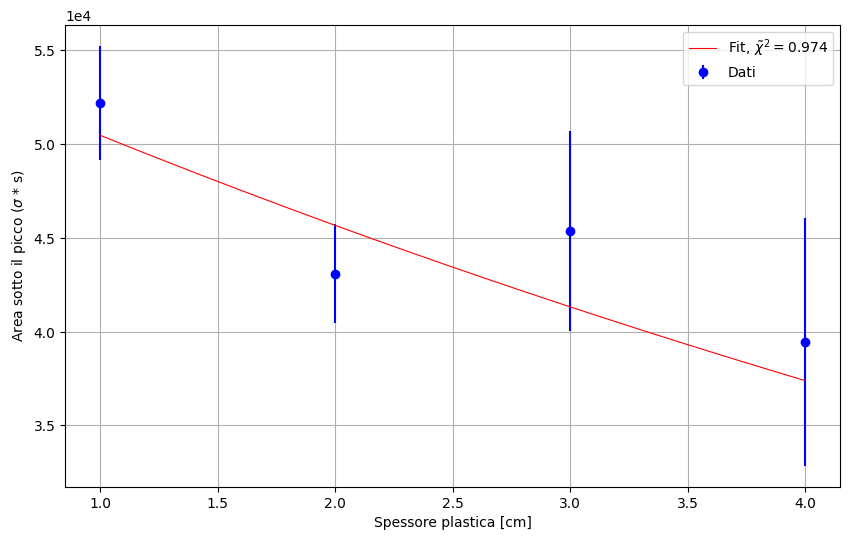

In [37]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4)], 
             yerr = [prop_err_mol(s1, sig1, err_S1, err_sig1),
                     prop_err_mol(s2, sig2, err_S2, err_sig2),
                     prop_err_mol(s3, sig3, err_S3, err_sig3),
                     prop_err_mol(s4, sig4, err_S4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = fr'Fit, $\tilde\chi^2 = {c2r_C_a_N:.3g}$', color = 'red', linewidth = 0.8)
plt.grid()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Co

In [38]:
# 1 cm
start_index = 90-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_1_al['ADC'][start_index:end_index_C], Co_C_1_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_1_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 3000, sigma = 1000, S = 100, a = 0, b = 0, limits = [['sigma', (0, None)]])
mu1 = vals[0]
s1 = vals[1]
sig1 = vals[2]
err_s1 = errs[1]
err_sig1 = errs[2]

# 2 cm
start_index = 90-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_2_al['ADC'][start_index:end_index_C], Co_C_2_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_2_al['Counts'][start_index:end_index_C])), gauss_pol1, 
                                   mu = 3000, sigma = 500, S = 50, a = 0, b = 0, limits = [['S', (0, None)]])
mu2 = vals[0]
s2 = vals[1]
sig2 = vals[2]
err_s2 = errs[1]
err_sig2 = errs[2]


# 3 cm
start_index = 100-65
end_index_C = 200 - 65
pars, vals, errs, *others = LS_fit_lims(Co_C_3_al['ADC'][start_index:end_index_C], Co_C_3_al['Counts'][start_index:end_index_C],
                                   np.array(np.sqrt(Co_C_3_al['Counts'][start_index:end_index_C])), gauss_cost, 
                                   mu = 3000, sigma = 500, S = 50, a = 0, limits = [['sigma', (0, None)]])
mu3 = vals[0]
s3 = vals[1]
sig3 = vals[2]
err_s3 = errs[1]
err_sig3 = errs[2]

# 4 cm
start_index = 100-65
end_index_C = 210 - 65
pars, vals, errs, *others = LS_fit(Co_C_4_al['ADC'][start_index : end_index_C], Co_C_4_al['Counts'][start_index : end_index_C], np.array(np.sqrt(Co_C_4_al['Counts'][start_index : end_index_C])),
                                      gauss_cost, mu = 2500, sigma = 1000, S = 50, a = 2)#, b = 0, c = 0)
mu4 = vals[0]
sig4 = vals[1]
s4 = vals[2]
err_sig4 = errs[1]
err_s4 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 158.3 (χ²/ndof = 1.4)      │              Nfcn = 205              │
│ EDM = 2.13e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.82e3   │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.69e3   │  0.04e3   │            │            │         │         │       │
│ 2 │ S     │   45.5    │    1.3    │            │            │         │         │       │
│ 3 │ a     │   1.80    │   0.32    │            │            │         │         │       │
│ 4 │ b     │  0.13e-3  │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b │
├───────┼───────────────────────────────────────────────────────────────────────┤
│    mu │      2.33e+03         0.2e3           0.7          1.68 -1.1758665e-3 │
│ sigma │         0.2e3      1.81e+03         -22.7          -7.2  -554.7566e-6 │
│     S │           0.7         -22.7          1.78         -0.02    -5.2703e-6 │
│     a │          1.68          -7.2         -0.02         0.101    -3.5714e-6 │
│     b │ -1.1758665e-3  -554.7566e-6    -5.2703e-6    -3.5714e-6      3.36e-09 │
└───────┴───────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 119.5 (χ²/ndof = 1.0)      │              Nfcn = 170              │
│ EDM = 0.000145 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.89e3   │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.58e3   │  0.04e3   │            │            │         │         │       │
│ 2 │ S     │   46.7    │    1.4    │            │            │         │         │       │
│ 3 │ a     │   1.92    │   0.27    │            │            │         │         │       │
│ 4 │ b     │  0.34e-3  │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b │
├───────┼──────────────────────────────────────────────────────────────────┤
│    mu │     2.17e+03        0.4e3         -0.2        -0.08 -1.135232e-3 │
│ sigma │        0.4e3     1.93e+03        -28.2        -5.85 -1.040690e-3 │
│     S │         -0.2        -28.2         2.09        -0.00    -6.200e-6 │
│     a │        -0.08        -5.85        -0.00       0.0712       816e-9 │
│     b │ -1.135232e-3 -1.040690e-3    -6.200e-6       816e-9     4.05e-09 │
└───────┴──────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 150.1 (χ²/ndof = 1.6)      │              Nfcn = 147              │
│ EDM = 5.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.86e3   │  0.05e3   │            │            │    0    │         │       │
│ 1 │ sigma │  1.93e3   │  0.08e3   │            │            │         │         │       │
│ 2 │ S     │   39.0    │    1.2    │            │            │         │         │       │
│ 3 │ a     │    1.1    │    0.7    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────┐
│       │      mu   sigma       S       a │
├───────┼─────────────────────────────────┤
│    mu │ 2.5e+03   0.4e3    -5.9    -0.3 │
│ sigma │   0.4e3 5.9e+03   -11.5   -47.1 │
│     S │    -5.9   -11.5    1.48    -0.2 │
│     a │    -0.3   -47.1    -0.2   0.533 │
└───────┴─────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 149.7 (χ²/ndof = 1.4)      │              Nfcn = 141              │
│ EDM = 6.13e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  3.78e3   │  0.05e3   │            │            │         │         │       │
│ 1 │ sigma │  1.73e3   │  0.06e3   │            │            │         │         │       │
│ 2 │ S     │   35.0    │    1.2    │            │            │         │         │       │
│ 3 │ a     │    2.2    │    0.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │       mu    sigma        S        a │
├───────┼─────────────────────────────────────┤
│    mu │ 2.76e+03    0.6e3     -5.8    -2.57 │
│ sigma │    0.6e3 3.75e+03    -25.8   -19.15 │
│     S │     -5.8    -25.8     1.43    -0.04 │
│     a │    -2.57   -19.15    -0.04    0.186 │
└───────┴─────────────────────────────────────┘

In [39]:

pars, vals, errs, *others = LS_fit([1,2,3,4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
                                            [prop_err_mol(s1, sig1, err_s1, err_sig1),
                                             prop_err_mol(s2, sig2, err_s2, err_sig2),
                                             prop_err_mol(s3, sig3, err_s3, err_sig3),
                                             prop_err_mol(s4, sig4, err_s4, err_sig4) ],
                                             exp, a = 1, b = 0.1)
att_B_al = vals[1]
err_att_B_al = errs[1]

# mu2 = vals[0]
# s2 = vals[1]
# sig2 = vals[2]
# err_S2 = errs[1]
# # err_sig2 = errs[2]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.805 (χ²/ndof = 2.4)      │              Nfcn = 396              │
│ EDM = 1.1e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   84e3    │    4e3    │            │            │         │         │       │
│ 1 │ b    │   0.068   │   0.019   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.64e+07  68.2602 │
│ b │  68.2602 0.000359 │
└───┴───────────────────┘

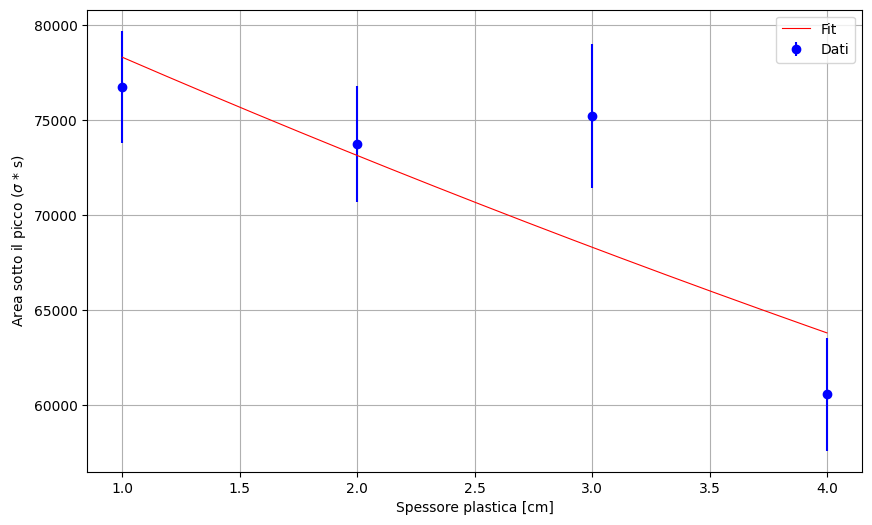

In [40]:
x = np.linspace(1, 4, 10000)
y = exp(x, vals[0], vals[1])
plt.figure(figsize = (10, 6))
plt.errorbar([1, 2, 3, 4], [s1*sig1, s2*sig2, s3*sig3, s4*sig4], 
             yerr = [prop_err_mol(s1, sig1, err_s1, err_sig1),
                     prop_err_mol(s2, sig2, err_s2, err_sig2),
                     prop_err_mol(s3, sig3, err_s3, err_sig3),
                     prop_err_mol(s4, sig4, err_s4, err_sig4) ],
             fmt = 'o', label = 'Dati', color = 'blue',)
plt.plot(x, y, label = 'Fit', color = 'red', linewidth = 0.8)
plt.grid()
plt.xlabel('Spessore plastica [cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()

### Confronto

In [41]:
# print(att_B_p, '+-', err_att_B_p, att_B_al, '+-', err_att_B_al)
# print(att_C_p, '+-', err_att_C_p, att_C_al, '+-', err_att_C_al)
# print(TestCompatibilita(att_B_p, att_C_p, err_att_B_p, err_att_C_p))



# Aria

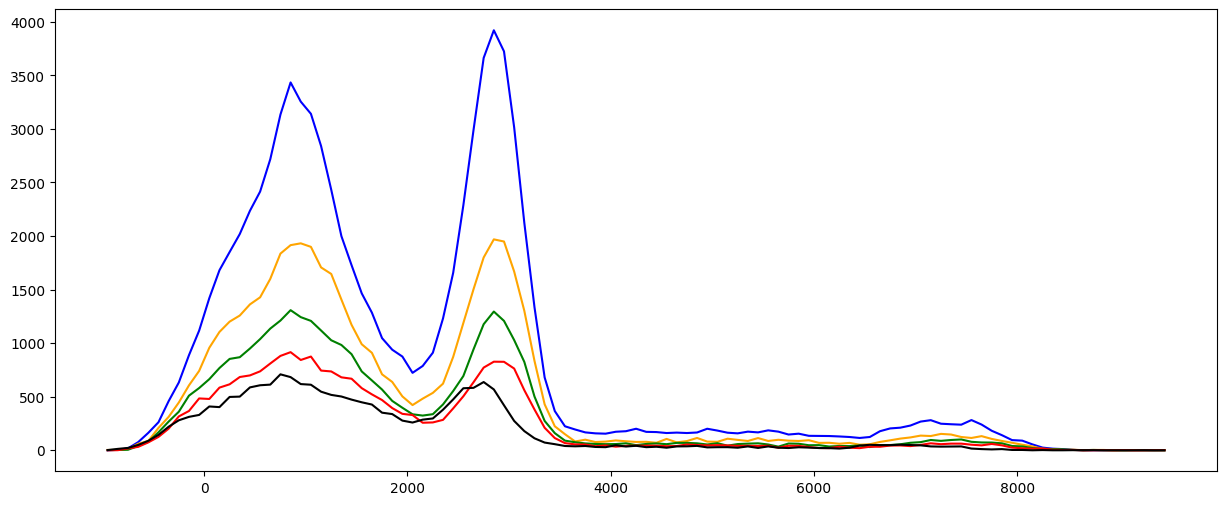

In [42]:
Na_B_1_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_1.txt', titles = ['ADC', 'Counts'])
Na_B_2_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_2.txt', titles = ['ADC', 'Counts'])
Na_B_3_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_3.txt', titles = ['ADC', 'Counts'])
Na_B_4_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_4.txt', titles = ['ADC', 'Counts'])
Na_B_5_ar = read_corretto (path = 'Dati/Parte 2/Aria/Na_bgo_5.txt', titles = ['ADC', 'Counts'])
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
start_index_ar = 0
end_index_ar = 170 - 65
plt.plot(Na_B_1_ar['ADC'][start_index_ar:end_index_ar], Na_B_1_ar['Counts'][start_index_ar:end_index_ar], label = '1 cm', color = 'blue')
plt.plot(Na_B_2_ar['ADC'][start_index_ar:end_index_ar], Na_B_2_ar['Counts'][start_index_ar:end_index_ar], label = '2 cm', color = 'orange')
plt.plot(Na_B_3_ar['ADC'][start_index_ar:end_index_ar], Na_B_3_ar['Counts'][start_index_ar:end_index_ar], label = '3 cm', color = 'green')
plt.plot(Na_B_4_ar['ADC'][start_index_ar:end_index_ar], Na_B_4_ar['Counts'][start_index_ar:end_index_ar], label = '4 cm', color = 'red')
plt.plot(Na_B_5_ar['ADC'][start_index_ar:end_index_ar], Na_B_5_ar['Counts'][start_index_ar:end_index_ar], label = '5 cm', color = 'black')

In [43]:
# 1cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_1_ar['ADC'][start_index_ar : end_index_ar], Na_B_1_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_1_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s1 = vals[2]
sig1 = vals[1]
err_s1 = errs[2]
err_sig1 = errs[1]

# 2cm
start_index_ar = 95 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_2_ar['ADC'][start_index_ar : end_index_ar], Na_B_2_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_2_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 3000, b = 0, c = 0)

s2 = vals[2]
sig2 = vals[1]
err_s2 = errs[2]
err_sig2 = errs[1]
# 3cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_3_ar['ADC'][start_index_ar : end_index_ar], Na_B_3_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_3_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s3 = vals[2]
sig3 = vals[1]
err_s3 = errs[2]
err_sig3 = errs[1]

# 4cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_4_ar['ADC'][start_index_ar : end_index_ar], Na_B_4_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_4_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s4 = vals[2]
sig4 = vals[1]
err_s4 = errs[2]
err_sig4 = errs[1]

# 5cm
start_index_ar = 94 - 65
end_index_ar = 118 - 65
pars, vals, errs, *others = LS_fit(Na_B_5_ar['ADC'][start_index_ar : end_index_ar], Na_B_5_ar['Counts'][start_index_ar : end_index_ar],
                                   np.array(np.sqrt(Na_B_5_ar['Counts'][start_index_ar:end_index_ar])),
                                   gauss_pol2, mu = 3000, sigma = 300, S = 3000, a = 0, b = 0, c = 0)

s5 = vals[2]
sig5 = vals[1]
err_s5 = errs[2]
err_sig5 = errs[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.66 (χ²/ndof = 2.6)      │              Nfcn = 328              │
│ EDM = 6.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8493e3  │ 0.0023e3  │            │            │         │         │       │
│ 1 │ sigma │   259.2   │    2.3    │            │            │         │         │       │
│ 2 │ S     │  3.636e3  │  0.033e3  │            │            │         │         │       │
│ 3 │ a     │  3.23e3   │  0.12e3   │            │            │         │         │       │
│ 4 │ b     │   -1.66   │   0.08    │            │            │         │         │       │
│ 5 │ c     │ 0.223e-3  │ 0.013e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          5.21            -1             6            89        -0.051    7.20614e-6 │
│ sigma │            -1           5.5           -22            61        -0.063   11.85830e-6 │
│     S │             6           -22      1.07e+03         0.6e3        -0.466   80.77495e-6 │
│     a │            89            61         0.6e3      1.47e+04        -9.877 1.55378203e-3 │
│     b │        -0.051        -0.063        -0.466        -9.877       0.00687   -1.10175e-6 │
│     c │    7.20614e-6   11.85830e-6   80.77495e-6 1.55378203e-3   -1.10175e-6      1.79e-10 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 56.38 (χ²/ndof = 3.3)      │              Nfcn = 384              │
│ EDM = 2.39e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 2.8718e3  │ 0.0035e3  │            │            │         │         │       │
│ 1 │ sigma │   267.3   │    3.5    │            │            │         │         │       │
│ 2 │ S     │  1.848e3  │  0.023e3  │            │            │         │         │       │
│ 3 │ a     │  1.86e3   │  0.10e3   │            │            │         │         │       │
│ 4 │ b     │   -0.94   │   0.06    │            │            │         │         │       │
│ 5 │ c     │ 0.123e-3  │ 0.010e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         12.3           -4            5          142       -0.078  10.44903e-6 │
│ sigma │           -4         12.2          -19           26       -0.047  10.02107e-6 │
│     S │            5          -19          536        0.3e3       -0.242  43.35235e-6 │
│     a │          142           26        0.3e3     9.87e+03       -6.291 955.09814e-6 │
│     b │       -0.078       -0.047       -0.242       -6.291      0.00417   -649.85e-9 │
│     c │  10.44903e-6  10.02107e-6  43.35235e-6 955.09814e-6   -649.85e-9     1.03e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.91 (χ²/ndof = 1.3)      │              Nfcn = 352              │
│ EDM = 0.000104 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.878e3  │  0.004e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     4     │            │            │         │         │       │
│ 2 │ S     │  1.144e3  │  0.019e3  │            │            │         │         │       │
│ 3 │ a     │  1.30e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.63   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   79e-6   │   8e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         17.7           -4            5           99      -0.0569   7.95993e-6 │
│ sigma │           -4         18.4          -23           69      -0.0690  12.75669e-6 │
│     S │            5          -23          360        0.2e3      -0.1672  29.08482e-6 │
│     a │           99           69        0.2e3     5.56e+03      -3.6841 572.39155e-6 │
│     b │      -0.0569      -0.0690      -0.1672      -3.6841      0.00252   -399.20e-9 │
│     c │   7.95993e-6  12.75669e-6  29.08482e-6 572.39155e-6   -399.20e-9      6.4e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.62 (χ²/ndof = 1.3)      │              Nfcn = 385              │
│ EDM = 1.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.896e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    256    │     5     │            │            │         │         │       │
│ 2 │ S     │    756    │    16     │            │            │         │         │       │
│ 3 │ a     │  1.18e3   │  0.07e3   │            │            │         │         │       │
│ 4 │ b     │   -0.58   │   0.05    │            │            │         │         │       │
│ 5 │ c     │   74e-6   │   7e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         28.7           -6            4          117      -0.0670   9.38849e-6 │
│ sigma │           -6         28.9          -19           85      -0.0822  15.03824e-6 │
│     S │            4          -19          246       0.17e3      -0.1430  24.97797e-6 │
│     a │          117           85       0.17e3     4.58e+03      -3.0295 470.17966e-6 │
│     b │      -0.0670      -0.0822      -0.1430      -3.0295      0.00207   -326.66e-9 │
│     c │   9.38849e-6  15.03824e-6  24.97797e-6 470.17966e-6   -326.66e-9     5.22e-11 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.9 (χ²/ndof = 0.7)       │              Nfcn = 496              │
│ EDM = 9.8e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  2.709e3  │  0.007e3  │            │            │         │         │       │
│ 1 │ sigma │    254    │     8     │            │            │         │         │       │
│ 2 │ S     │    512    │    14     │            │            │         │         │       │
│ 3 │ a     │   1000    │    60     │            │            │         │         │       │
│ 4 │ b     │   -0.50   │   0.04    │            │            │         │         │       │
│ 5 │ c     │   64e-6   │   5e-6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────┐
│       │            mu         sigma             S             a             b             c │
├───────┼─────────────────────────────────────────────────────────────────────────────────────┤
│    mu │          55.8           -20            -0           220       -0.1193  16.056925e-6 │
│ sigma │           -20            59           -20          -110        0.0246    465.013e-9 │
│     S │            -0           -20           189       -0.05e3        0.0034   2.516582e-6 │
│     a │           220          -110       -0.05e3       3.6e+03       -2.1259 307.376118e-6 │
│     b │       -0.1193        0.0246        0.0034       -2.1259       0.00131   -196.632e-9 │
│     c │  16.056925e-6    465.013e-9   2.516582e-6 307.376118e-6   -196.632e-9      3.01e-11 │
└───────┴─────────────────────────────────────────────────────────────────────────────────────┘

## Confronto

In [44]:
x_aria = np.linspace(1, 5, 5)
y_aria = (abs(s1*sig1), abs(s2*sig2), abs(s3*sig3), abs(s4*sig4), abs(s5*sig5))
er_aria =  (prop_err_mol(s1, sig1, err_s1, err_sig1),
            prop_err_mol(s2, sig2, err_s2, err_sig2),
            prop_err_mol(s3, sig3, err_s3, err_sig3),
            prop_err_mol(s4, sig4, err_s4, err_sig4),
            prop_err_mol(s5, sig5, err_s5, err_sig5))

pars, vals, errs, *others = LS_fit(x_aria, y_aria, er_aria, ang_sol_exp, a = 8.2e6, b = 1.87, c = 0)

c2r_aria = others[2] / others[1]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.3212 (χ²/ndof = 0.2)     │              Nfcn = 123              │
│ EDM = 0.000113 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   8.8e6   │   1.9e6   │            │            │         │         │       │
│ 1 │ b    │   1.96    │   0.28    │            │            │         │         │       │
│ 2 │ c    │   0.065   │   0.032   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     3.56e+12  522.41849e3 59.2939673e3 │
│ b │  522.41849e3       0.0772       0.0086 │
│ c │ 59.2939673e3       0.0086      0.00102 │
└───┴────────────────────────────────────────┘

__Commento__ \
il parametro b rappresenta la distanza dall'origine della posizione di misura al sipm

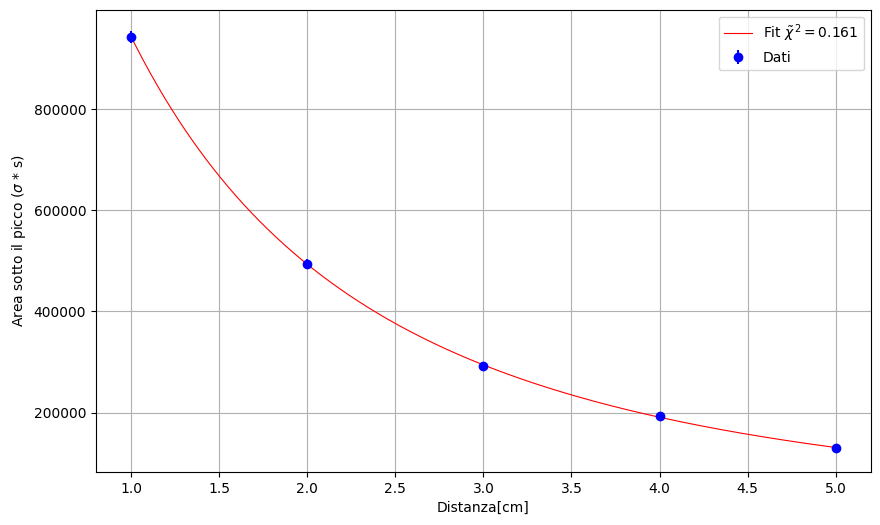

In [45]:
plt.figure(figsize = (10, 6))
plt.errorbar(x_aria, y_aria, yerr = er_aria, fmt = 'o', label = 'Dati', color = 'blue')
plt.plot(np.linspace(1, 5, 10000), ang_sol_exp(np.linspace(1, 5, 10000),
            vals[0], vals[1], vals[2]), label = fr'Fit $\tilde\chi^2 = {c2r_aria:.3g}$', 
            color = 'red', linewidth = 0.8)

plt.grid()
plt.xlabel('Distanza[cm]')
plt.ylabel('Area sotto il picco ($\\sigma$ * s)')
plt.legend()
plt.show()